In [31]:
import pandas as pd
pd.options.display.max_columns = 200

import awswrangler as wr

from lib_anomaly.plots import plot_results

In [2]:
sql = """select
	dataset_name 
	, clf
	, contamination
	, metric 
    , count(distinct experiment) as no_experiments
	, avg(base_line) as base_line
	, stddev(base_line) as base_line__std
	, avg(lof) as lof
	, stddev(lof) as lof__std
	, avg(iforest) as iforest
	, stddev(iforest) as iforest__std
	, avg(autoencoder) as autoencoder
	, stddev(autoencoder) as autoencoder__std
	, avg(ensamble) as ensamble
	, stddev(ensamble) as ensamble__std
	, avg(ensamble_p_0_3) as ensamble_p_0_3
	, stddev(ensamble_p_0_3) as ensamble_p_0_3__std
from outliers_detection.experiments_results
where random_state is null
group by 1,2,3,4"""
df = wr.athena.read_sql_query(sql=sql, database="default")
print(f"{df.shape=}")
df.head()

df.shape=(720, 17)


,dataset_name,clf,contamination,metric,no_experiments,base_line,base_line__std,lof,lof__std,iforest,iforest__std,autoencoder,autoencoder__std,ensamble,ensamble__std,ensamble_p_0_3,ensamble_p_0_3__std
0,heart_faliure,AB,0.10,accuracy_train,127,0.854949,0.006262,0.849333,0.007011,0.855085,0.008188,0.855264,0.007085,0.851520,0.006848,0.860340,0.010179
1,credit_risk,RF,0.10,accuracy_test,110,0.715727,0.034547,0.726465,0.036153,0.716970,0.033577,0.712121,0.037913,0.719394,0.034631,0.742461,0.043757
2,diabetes,AB,0.10,mse_test,22,0.029495,0.001520,0.029440,0.001374,0.026099,0.002105,0.025438,0.002536,0.025227,0.000924,0.029912,0.001317
3,breast_cancer,SVC,0.10,r2_train,127,0.899790,0.014842,0.899706,0.013865,0.895780,0.013710,0.888929,0.014855,0.897207,0.013813,0.893944,0.016188
4,heart_faliure,RF,0.01,recall_test,24,0.882353,0.041292,0.881520,0.037410,0.877271,0.041781,0.883399,0.046367,0.870572,0.041461,0.902816,0.044989


:::::::::::::::::::::::::::::::::::::::::::::::::: credit_risk 0.1


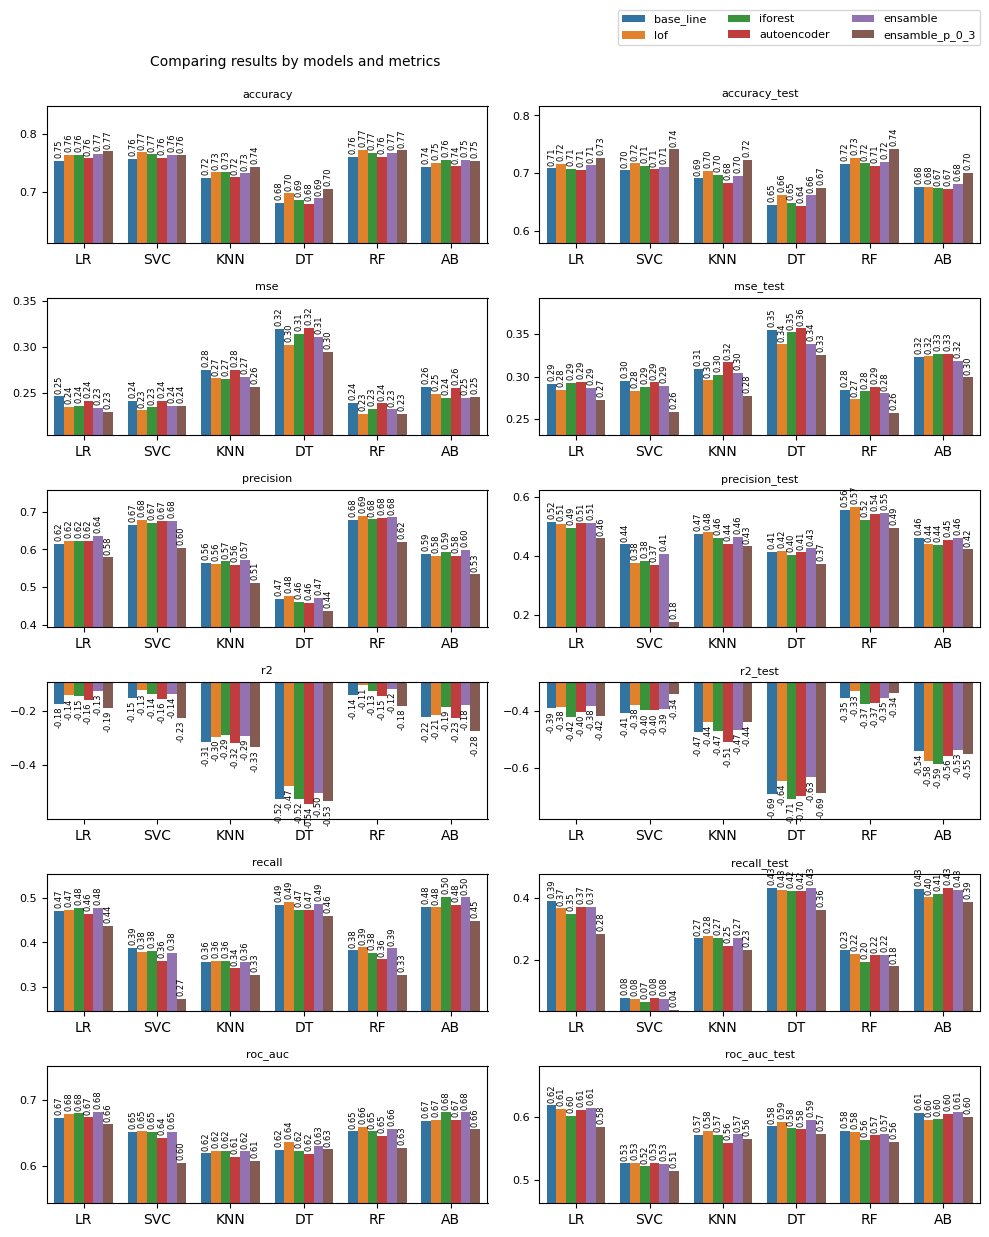

:::::::::::::::::::::::::::::::::::::::::::::::::: credit_risk 0.01


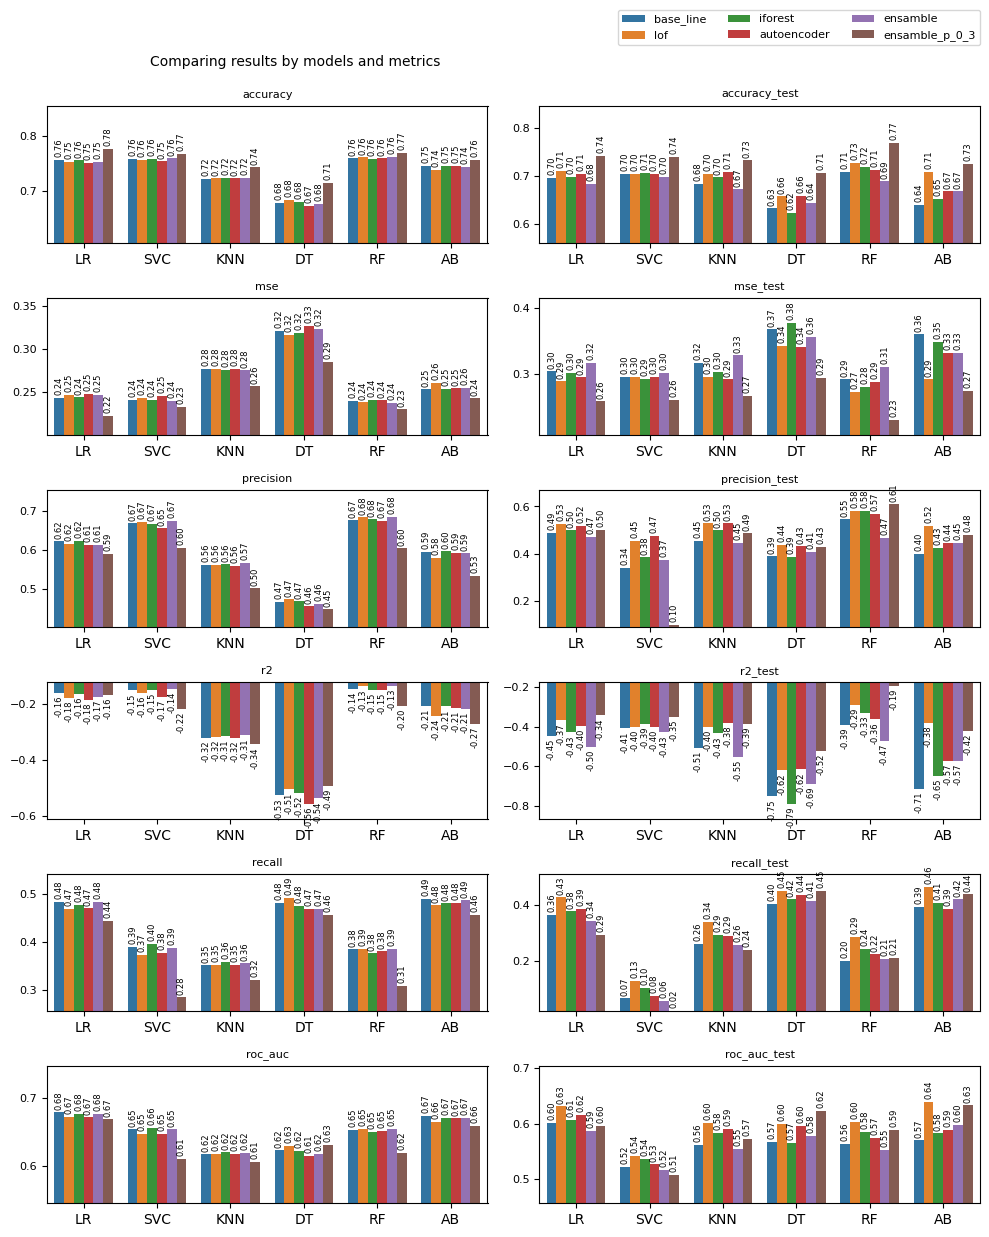

:::::::::::::::::::::::::::::::::::::::::::::::::: heart_faliure 0.1


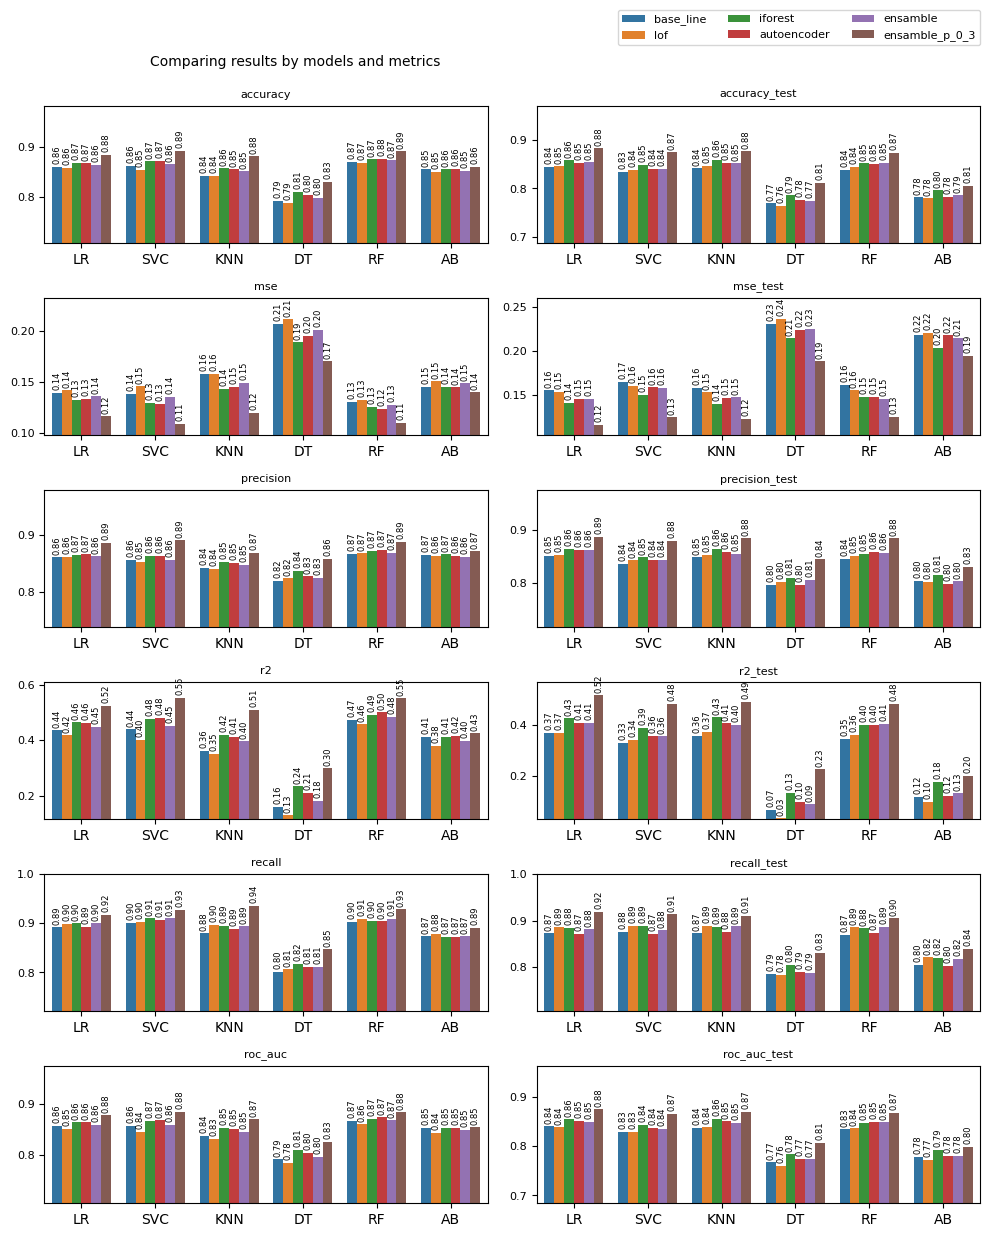

:::::::::::::::::::::::::::::::::::::::::::::::::: heart_faliure 0.01


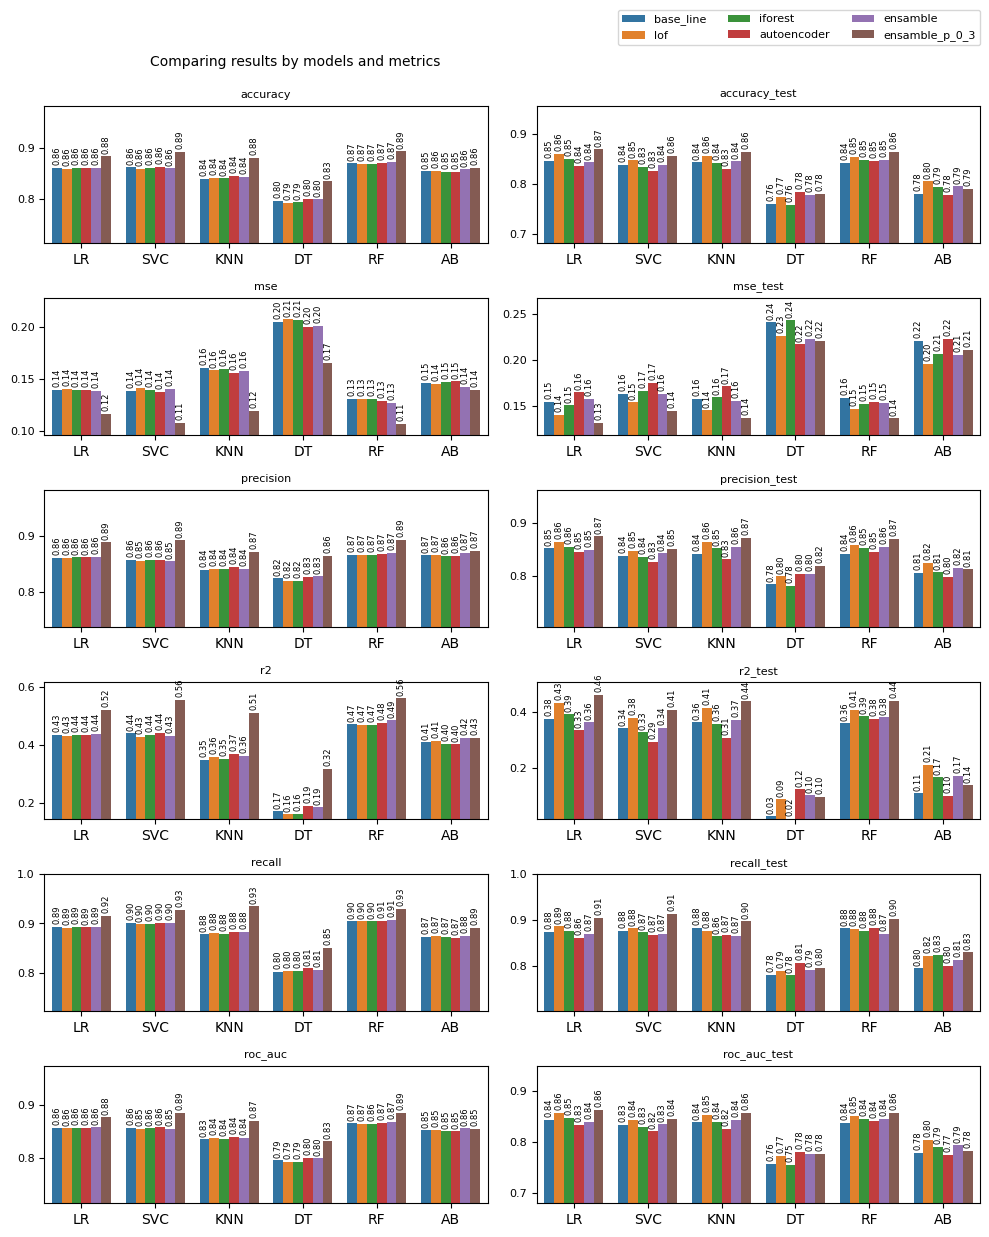

:::::::::::::::::::::::::::::::::::::::::::::::::: credit_card 0.1


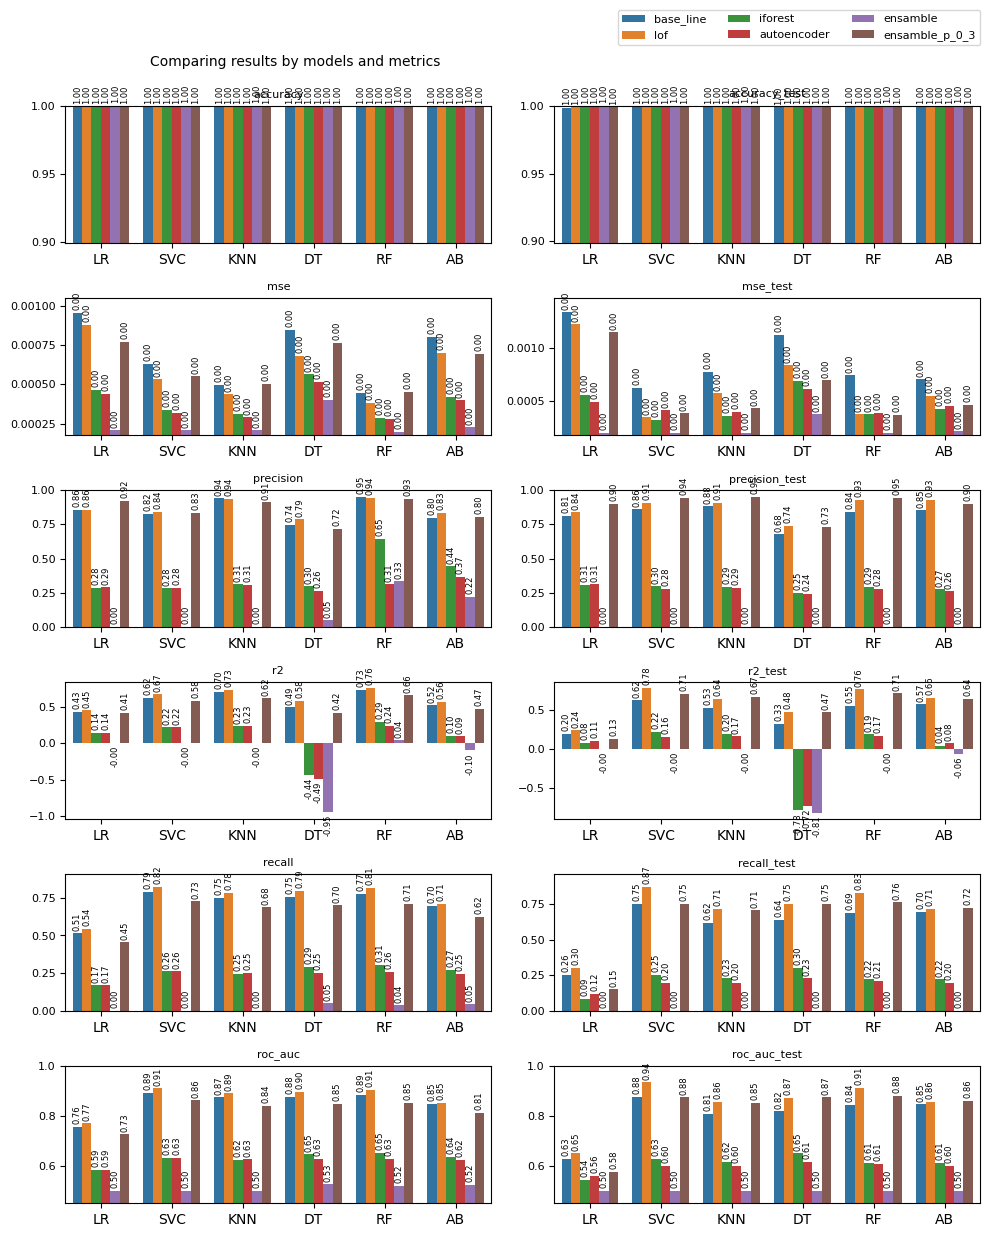

:::::::::::::::::::::::::::::::::::::::::::::::::: diabetes 0.1


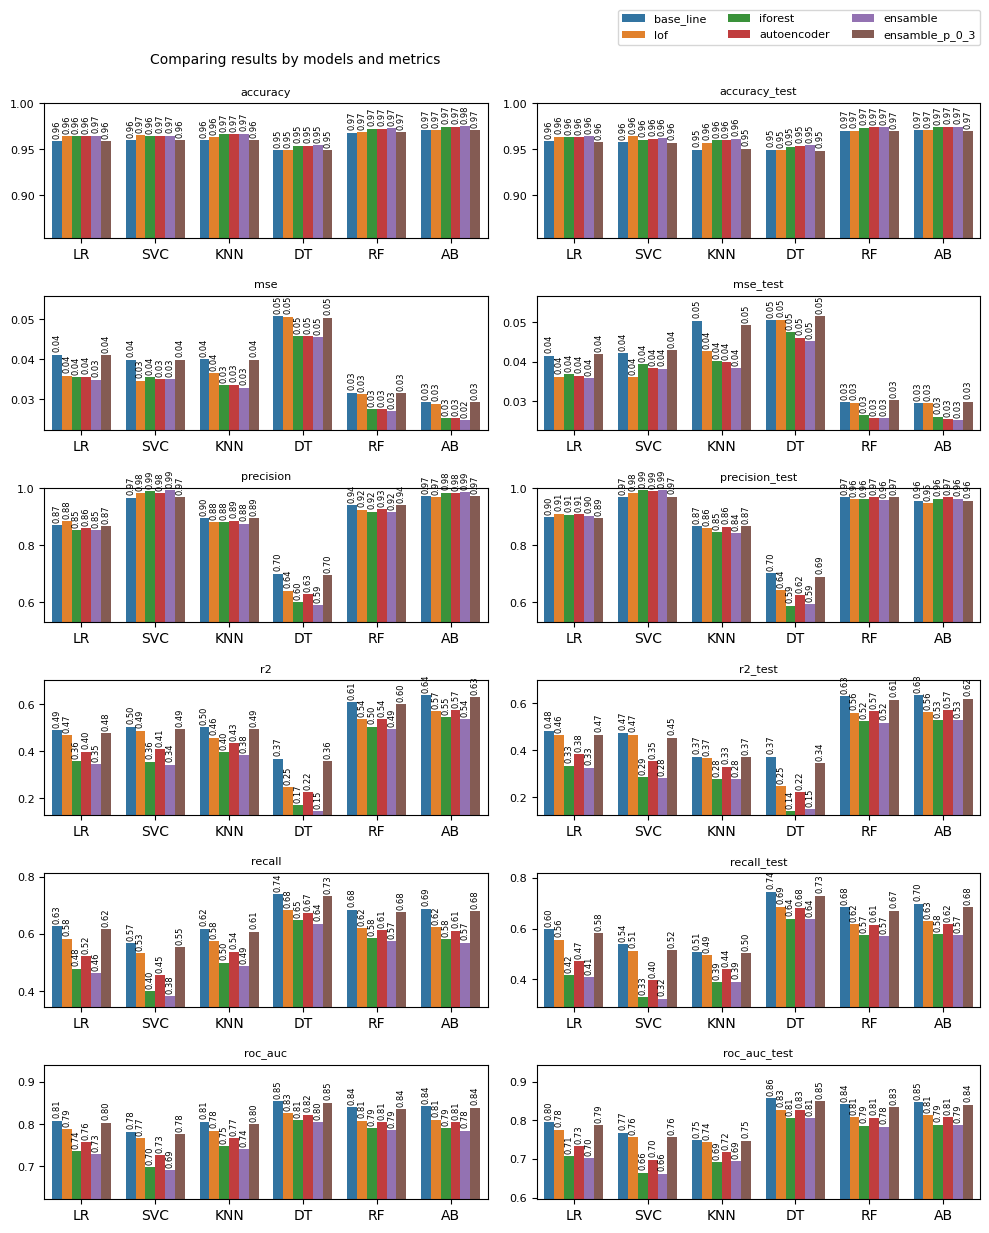

:::::::::::::::::::::::::::::::::::::::::::::::::: breast_cancer 0.1


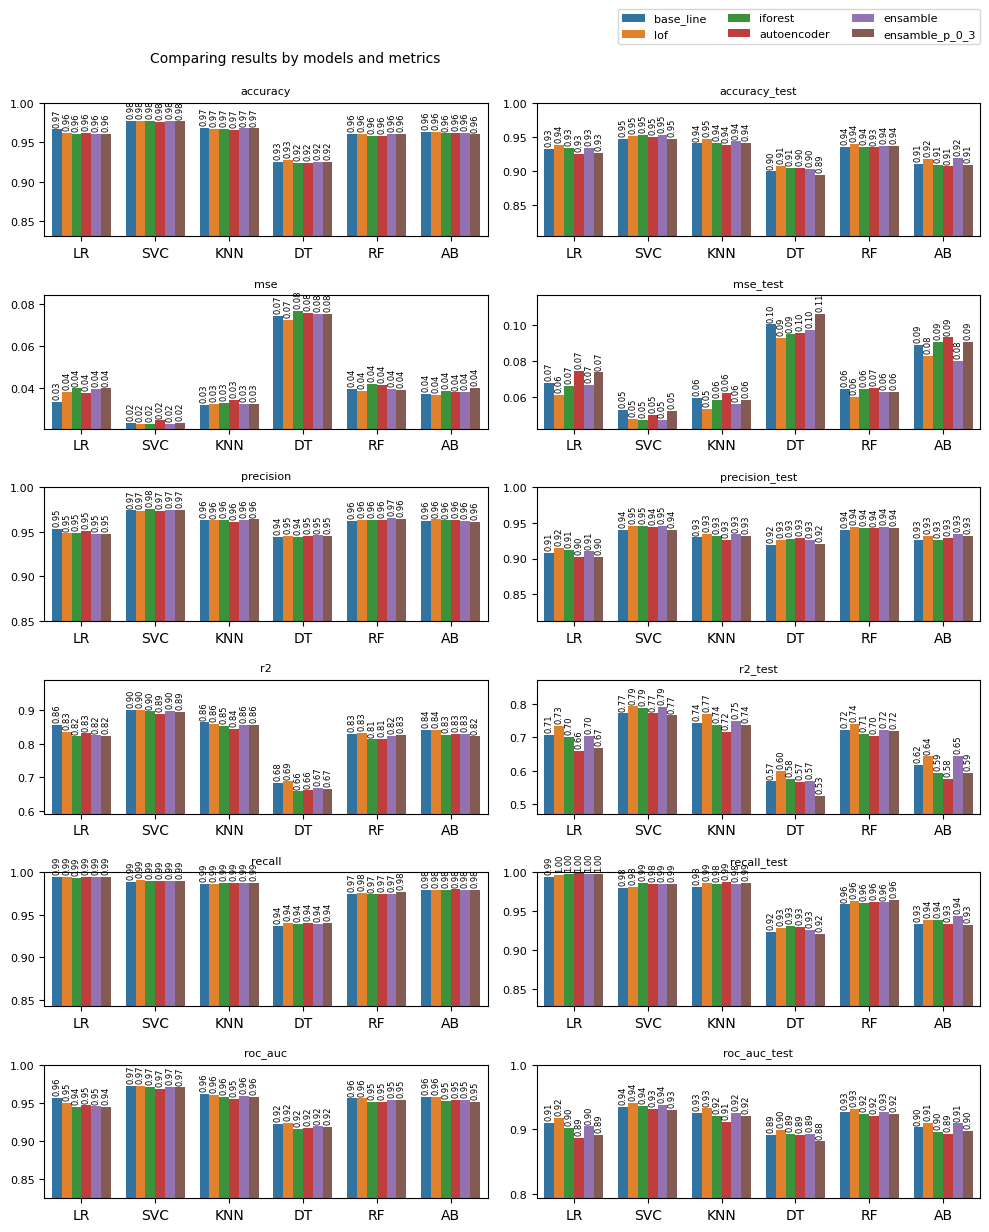

:::::::::::::::::::::::::::::::::::::::::::::::::: breast_cancer 0.01


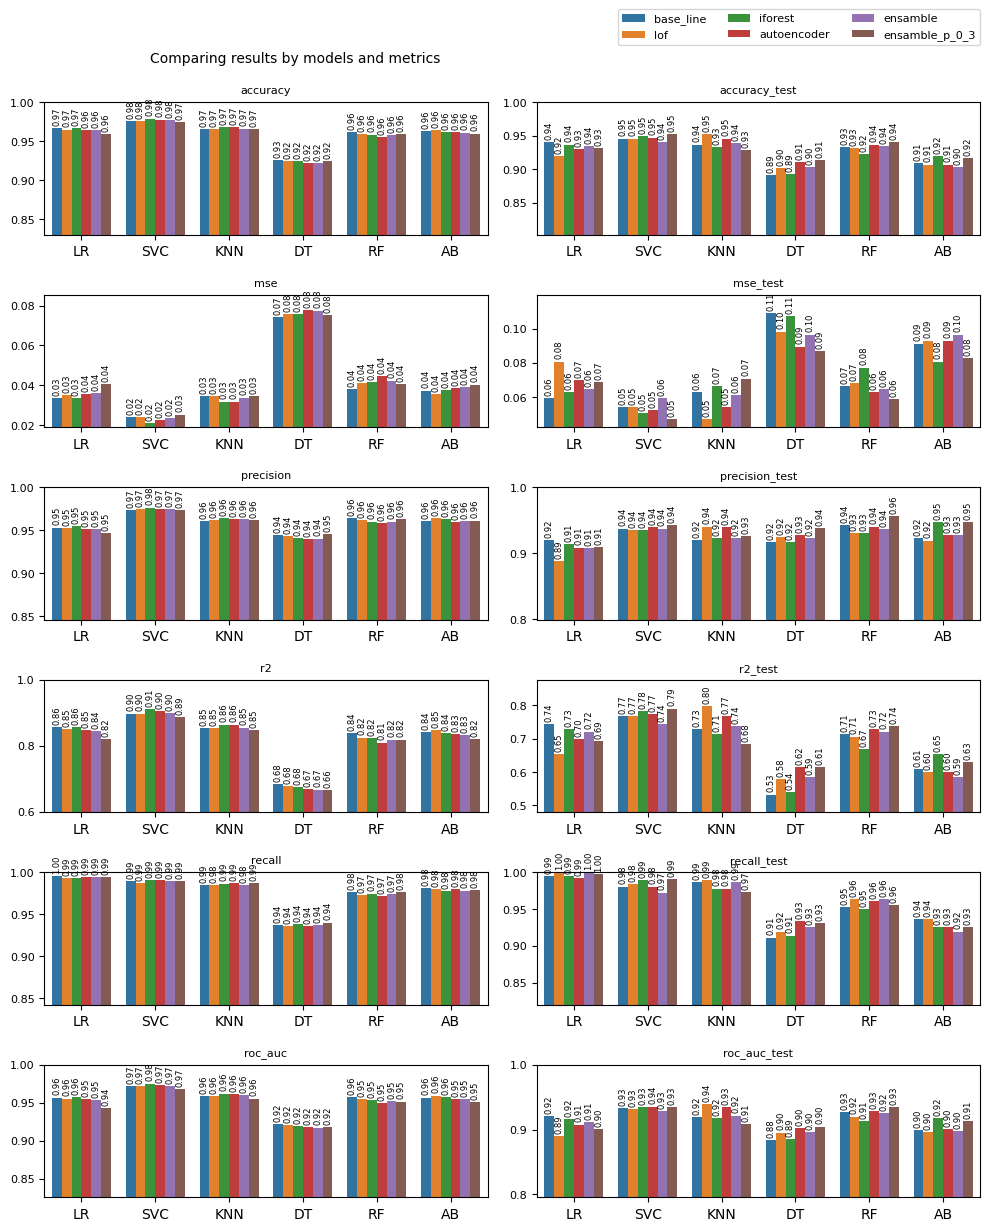

:::::::::::::::::::::::::::::::::::::::::::::::::: titanic 0.1


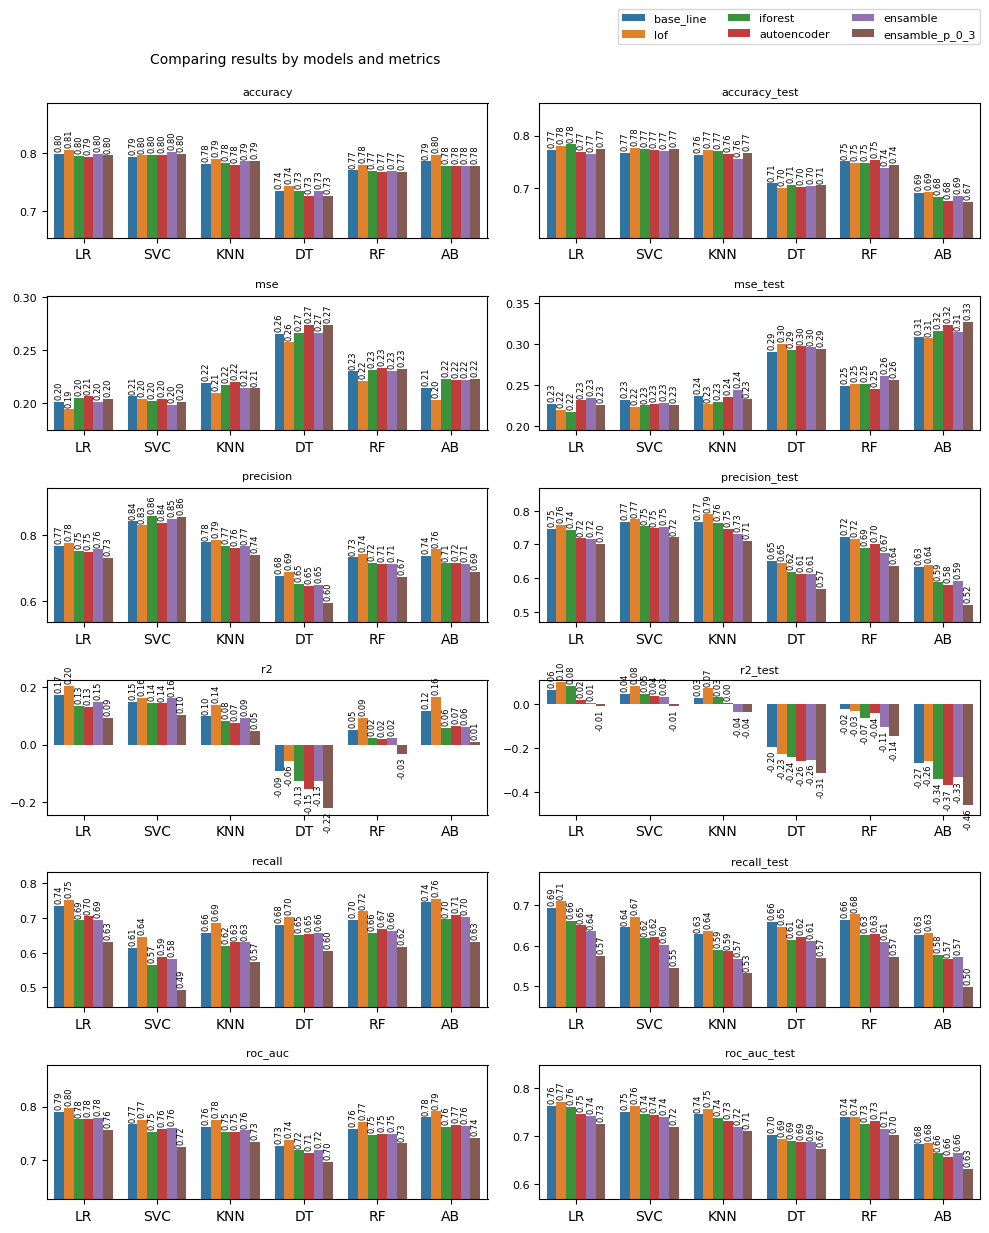

:::::::::::::::::::::::::::::::::::::::::::::::::: titanic 0.01


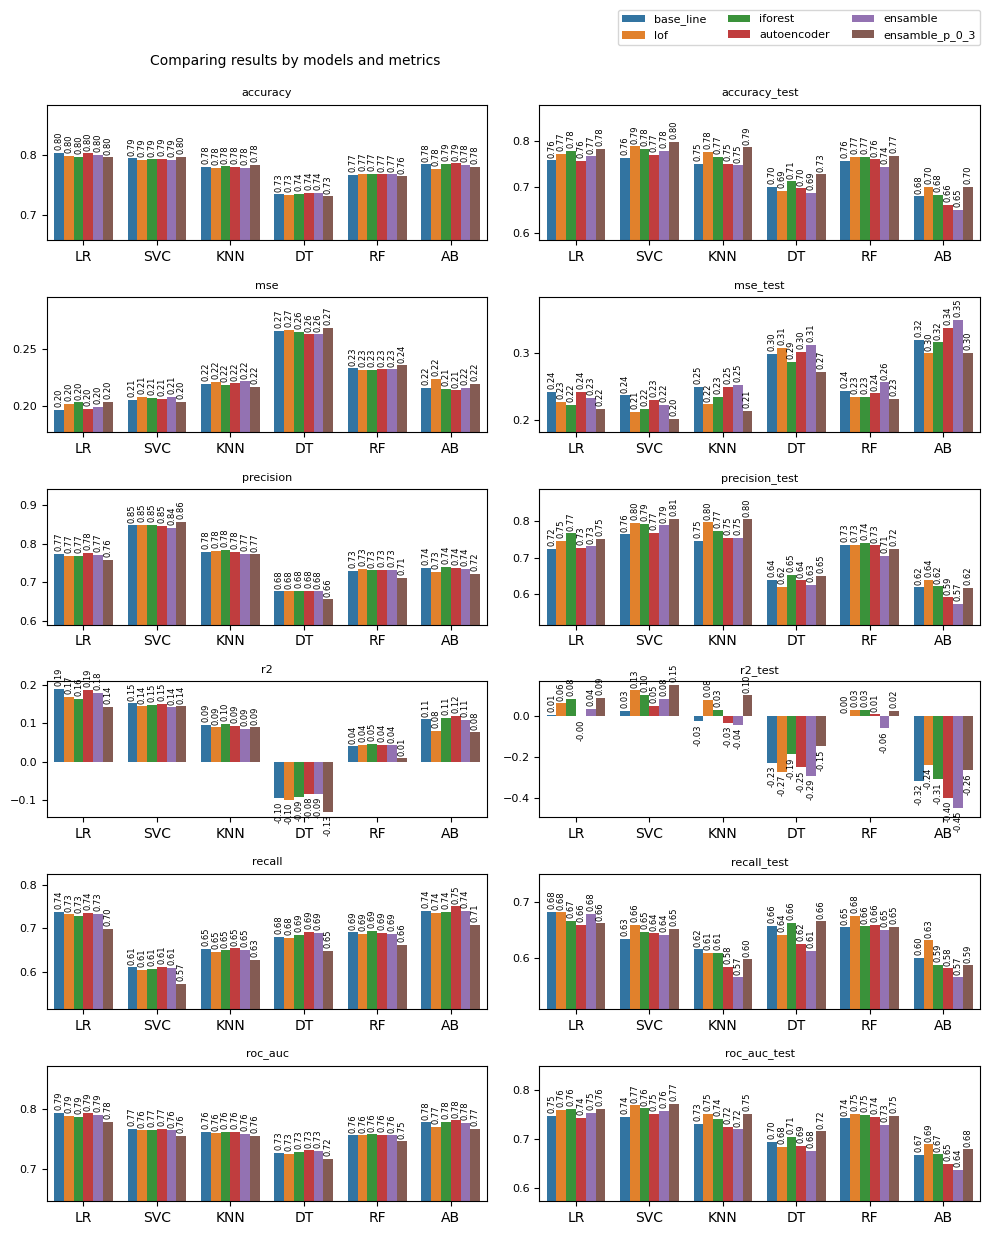

In [4]:
cols_to_delete = [c for c in df if c.endswith("_std")]+["no_experiments"]
for dat in set(df["dataset_name"]):
    for contamination in set(df["contamination"]):
        filtro = (df["contamination"]==contamination) & (df["dataset_name"]==dat)
        tmp = df[filtro].drop(cols_to_delete,axis=1)
        if len(tmp)>0:
            print(":"*50, dat, contamination)
            plot_results(results=tmp)

In [62]:
df.head()

,dataset_name,clf,contamination,metric,no_experiments,base_line,base_line__std,lof,lof__std,iforest,iforest__std,autoencoder,autoencoder__std,ensamble,ensamble__std,ensamble_p_0_3,ensamble_p_0_3__std
0,heart_faliure,AB,0.10,accuracy_train,127,0.854949,0.006262,0.849333,0.007011,0.855085,0.008188,0.855264,0.007085,0.851520,0.006848,0.860340,0.010179
1,credit_risk,RF,0.10,accuracy_test,110,0.715727,0.034547,0.726465,0.036153,0.716970,0.033577,0.712121,0.037913,0.719394,0.034631,0.742461,0.043757
2,diabetes,AB,0.10,mse_test,22,0.029495,0.001520,0.029440,0.001374,0.026099,0.002105,0.025438,0.002536,0.025227,0.000924,0.029912,0.001317
3,breast_cancer,SVC,0.10,r2_train,127,0.899790,0.014842,0.899706,0.013865,0.895780,0.013710,0.888929,0.014855,0.897207,0.013813,0.893944,0.016188
4,heart_faliure,RF,0.01,recall_test,24,0.882353,0.041292,0.881520,0.037410,0.877271,0.041781,0.883399,0.046367,0.870572,0.041461,0.902816,0.044989


In [92]:
df.columns

Index(['dataset_name', 'clf', 'contamination', 'metric', 'no_experiments',
       'base_line', 'base_line__std', 'lof', 'lof__std', 'iforest',
       'iforest__std', 'autoencoder', 'autoencoder__std', 'ensamble',
       'ensamble__std', 'ensamble_p_0_3', 'ensamble_p_0_3__std'],
      dtype='object')

In [93]:
filtro = df["metric"].str.contains("roc_auc")
cols = [c for c in df if c.endswith("__std")]
tmp = df[filtro].drop(cols, axis=1).copy()
for c in ["lof","iforest","autoencoder","ensamble","ensamble_p_0_3"]:
    tmp[c+"__diff"] = tmp[c]-tmp["base_line"]
tmp

,dataset_name,clf,contamination,metric,no_experiments,base_line,lof,iforest,autoencoder,ensamble,ensamble_p_0_3,lof__diff,iforest__diff,autoencoder__diff,ensamble__diff,ensamble_p_0_3__diff
8,diabetes,KNN,0.10,roc_auc_train,22,0.805767,0.784600,0.747519,0.766652,0.741494,0.800670,-0.021167,-0.058247,-0.039115,-0.064272,-0.005096
14,heart_faliure,LR,0.10,roc_auc_test,127,0.840963,0.838812,0.855234,0.851960,0.850496,0.875700,-0.002150,0.014271,0.010998,0.009533,0.034737
20,credit_card,AB,0.10,roc_auc_train,3,0.848053,0.853921,0.635883,0.623318,0.522557,0.812013,0.005868,-0.212170,-0.224735,-0.325496,-0.036041
31,heart_faliure,RF,0.10,roc_auc_test,127,0.834665,0.836896,0.847988,0.849598,0.849114,0.868165,0.002230,0.013322,0.014933,0.014449,0.033500
35,heart_faliure,DT,0.01,roc_auc_test,24,0.756785,0.772473,0.754571,0.780449,0.776249,0.776594,0.015688,-0.002214,0.023664,0.019464,0.019809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,credit_risk,SVC,0.01,roc_auc_train,10,0.653439,0.647197,0.655315,0.646419,0.653741,0.609716,-0.006242,0.001876,-0.007020,0.000302,-0.043724
706,credit_card,DT,0.10,roc_auc_train,3,0.876934,0.896447,0.645830,0.627224,0.526172,0.848707,0.019513,-0.231104,-0.249710,-0.350762,-0.028227
707,heart_faliure,KNN,0.10,roc_auc_test,127,0.837779,0.839074,0.856075,0.850703,0.847477,0.869928,0.001294,0.018295,0.012924,0.009697,0.032149
714,breast_cancer,RF,0.10,roc_auc_test,127,0.926650,0.931267,0.923307,0.920160,0.926303,0.924034,0.004617,-0.003343,-0.006490,-0.000346,-0.002616


In [102]:
met = "lof"
ix_cols = ["dataset_name","clf","contamination","metric"]
cols = [c for c in tmp if c.startswith(met)]
tmp[ix_cols+["no_experiments","base_line"]+cols].sort_values(met+"__diff", ascending=False)

,dataset_name,clf,contamination,metric,no_experiments,base_line,lof,lof__diff
371,credit_card,RF,0.10,roc_auc_test,3,0.843860,0.914483,0.070623
626,credit_risk,AB,0.01,roc_auc_test,10,0.569524,0.638913,0.069389
55,credit_card,SVC,0.10,roc_auc_test,3,0.875781,0.935006,0.059225
361,credit_card,DT,0.10,roc_auc_test,3,0.818890,0.873525,0.054635
619,credit_card,KNN,0.10,roc_auc_test,3,0.808440,0.856724,0.048284
...,...,...,...,...,...,...,...,...
698,breast_cancer,LR,0.01,roc_auc_test,10,0.921032,0.890476,-0.030556
598,diabetes,RF,0.10,roc_auc_train,22,0.840044,0.808238,-0.031806
497,diabetes,AB,0.10,roc_auc_train,22,0.843031,0.810513,-0.032518
41,diabetes,RF,0.10,roc_auc_test,22,0.841101,0.807301,-0.033799


In [103]:
met = "iforest"
ix_cols = ["dataset_name","clf","contamination","metric"]
cols = [c for c in tmp if c.startswith(met)]
tmp[ix_cols+["no_experiments","base_line"]+cols].sort_values(met+"__diff", ascending=False)

,dataset_name,clf,contamination,metric,no_experiments,base_line,iforest,iforest__diff
363,credit_risk,RF,0.01,roc_auc_test,10,0.562857,0.584710,0.021853
374,credit_risk,KNN,0.01,roc_auc_test,10,0.562143,0.582899,0.020756
405,heart_faliure,DT,0.10,roc_auc_train,127,0.791869,0.810170,0.018300
707,heart_faliure,KNN,0.10,roc_auc_test,127,0.837779,0.856075,0.018295
254,breast_cancer,AB,0.01,roc_auc_test,10,0.899008,0.917262,0.018254
...,...,...,...,...,...,...,...,...
371,credit_card,RF,0.10,roc_auc_test,3,0.843860,0.611085,-0.232775
568,credit_card,AB,0.10,roc_auc_test,3,0.847418,0.611059,-0.236359
55,credit_card,SVC,0.10,roc_auc_test,3,0.875781,0.626958,-0.248823
530,credit_card,KNN,0.10,roc_auc_train,3,0.874764,0.624331,-0.250433


In [104]:
met = "autoencoder"
ix_cols = ["dataset_name","clf","contamination","metric"]
cols = [c for c in tmp if c.startswith(met)]
tmp[ix_cols+["no_experiments","base_line"]+cols].sort_values(met+"__diff", ascending=False)

,dataset_name,clf,contamination,metric,no_experiments,base_line,autoencoder,autoencoder__diff
427,credit_risk,DT,0.01,roc_auc_test,10,0.566667,0.595870,0.029203
374,credit_risk,KNN,0.01,roc_auc_test,10,0.562143,0.589928,0.027785
35,heart_faliure,DT,0.01,roc_auc_test,24,0.756785,0.780449,0.023664
626,credit_risk,AB,0.01,roc_auc_test,10,0.569524,0.588261,0.018737
542,breast_cancer,DT,0.01,roc_auc_test,10,0.884127,0.902381,0.018254
...,...,...,...,...,...,...,...,...
568,credit_card,AB,0.10,roc_auc_test,3,0.847418,0.599154,-0.248264
706,credit_card,DT,0.10,roc_auc_train,3,0.876934,0.627224,-0.249710
135,credit_card,RF,0.10,roc_auc_train,3,0.886509,0.629130,-0.257379
668,credit_card,SVC,0.10,roc_auc_train,3,0.894226,0.631724,-0.262502


In [105]:
met = "ensamble"
ix_cols = ["dataset_name","clf","contamination","metric"]
cols = [c for c in tmp if c.startswith(met)]
tmp[ix_cols+["no_experiments","base_line"]+cols].sort_values(met+"__diff", ascending=False)

,dataset_name,clf,contamination,metric,no_experiments,base_line,ensamble,ensamble_p_0_3,ensamble__diff,ensamble_p_0_3__diff
626,credit_risk,AB,0.01,roc_auc_test,10,0.569524,0.597681,0.632525,0.028157,0.063001
35,heart_faliure,DT,0.01,roc_auc_test,24,0.756785,0.776249,0.776594,0.019464,0.019809
105,heart_faliure,AB,0.01,roc_auc_test,24,0.777957,0.792599,0.782203,0.014642,0.004246
31,heart_faliure,RF,0.10,roc_auc_test,127,0.834665,0.849114,0.868165,0.014449,0.033500
138,credit_risk,AB,0.10,roc_auc_train,110,0.667785,0.680950,0.655418,0.013165,-0.012367
...,...,...,...,...,...,...,...,...,...,...
706,credit_card,DT,0.10,roc_auc_train,3,0.876934,0.526172,0.848707,-0.350762,-0.028227
135,credit_card,RF,0.10,roc_auc_train,3,0.886509,0.518868,0.853351,-0.367641,-0.033158
530,credit_card,KNN,0.10,roc_auc_train,3,0.874764,0.500000,0.842396,-0.374764,-0.032367
55,credit_card,SVC,0.10,roc_auc_test,3,0.875781,0.500000,0.875148,-0.375781,-0.000632


In [106]:
met = "ensamble_p_0_3"
ix_cols = ["dataset_name","clf","contamination","metric"]
cols = [c for c in tmp if c.startswith(met)]
tmp[ix_cols+["no_experiments","base_line"]+cols].sort_values(met+"__diff", ascending=False)

,dataset_name,clf,contamination,metric,no_experiments,base_line,ensamble_p_0_3,ensamble_p_0_3__diff
626,credit_risk,AB,0.01,roc_auc_test,10,0.569524,0.632525,0.063001
427,credit_risk,DT,0.01,roc_auc_test,10,0.566667,0.623000,0.056334
361,credit_card,DT,0.10,roc_auc_test,3,0.818890,0.874995,0.056105
619,credit_card,KNN,0.10,roc_auc_test,3,0.808440,0.852632,0.044192
611,heart_faliure,DT,0.10,roc_auc_test,127,0.767179,0.807866,0.040687
...,...,...,...,...,...,...,...,...
79,titanic,SVC,0.10,roc_auc_train,109,0.766747,0.724282,-0.042464
705,credit_risk,SVC,0.01,roc_auc_train,10,0.653439,0.609716,-0.043724
136,credit_risk,SVC,0.10,roc_auc_train,110,0.651967,0.604593,-0.047374
687,titanic,AB,0.10,roc_auc_test,109,0.681906,0.631002,-0.050904
